
<h1 style="text-align: center; color: navy;">Project 003 WGAN for Financial Time-Series</h1>

<p style="text-align: center;">
    <img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Vertical-SinFondo.png" alt="Logo de ITESO">
</p>

<h2 style= "text-align: center; color: #2b2726 ;">	MICROESTRUCTURA Y SISTEMAS DE "TRADING"</h2>

<h3 style="text-align: center; color: #2b2726 ;">Hecho por: Bernardo Ramírez González y Estephanie López</h3>



<h2 style="color: navy;">Introduction</h2> 
The generation of synthetic data in finance has gained significance due to the need for controlled environments for model testing and risk analysis. Financial time series, characterized by high volatility and external shocks, pose challenges for traditional data generation models. Generative Adversarial Networks (GANs) offer a powerful solution, with the Wasserstein GAN with Gradient Penalty (WGAN-GP) being especially effective in ensuring training stability and preventing mode collapse, common issues in GAN training. This project leverages WGAN-GP to generate synthetic stock price series by learning the underlying dynamics of historical price data, aiming to produce realistic data that can support financial modeling, risk management, and scenario analysis.




<p style="text-align: center;">
    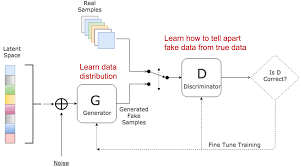
</p>



<h2 style="color: navy;"Model: Development Process</h2> 

<h2 style="color: navy;">Model: Development Process</h2>
We began by developing two dense neural networks: one for generating synthetic data (Generator Network) and another for distinguishing between real and synthetic data (Discriminator Network).

<h4>Generator network</h4>
The Generator network accepts a vector of random noise (or "latent vector") as input and processes it through a series of dense layers to produce a time series that mimics real financial data. The architecture includes the following layers:

* Dense Layer 1: 50 units, followed by a LeakyReLU activation.
* Dense Layer 2: 200 units with LeakyReLU.
* Dense Layer 3: 512 units with LeakyReLU.
* Dense Layers 4 & 5: Each with 2 × ts_dim units and LeakyReLU activations.
* Dense Layer 6: Dense Layer 6: ts_dim units with LeakyReLU.

LeakyReLU activations are used throughout the network to provide a slope for negative inputs, helping to stabilize training by allowing a small gradient when units are inactive. The final output is a vector of size ts_dim, representing a synthetic time series.

| <span style="color: red;">Note:</span> ts_dim is the length of the time series (here, ts_dim = 252), representing the number of time steps in each generated sequence, typically matching the real financial series length. |

<h4>Discriminator network</h4>
The Discriminator network is tasked with evaluating whether a given time series is real (from the dataset) or synthetic (produced by the Generator). Its architecture is as follows:

* Dense Layer 1: 2 × ts_dim with a LeakyReLU activation.
* Dense Layer 2: 4 × ts_dim units with LeakyReLU.
* Dense Layers 3 & 4: Each with 5 × ts_dim units and LeakyReLU activations.
* Dense Layer 5: 6 × ts_dim units with LeakyReLU.
* Dense Layer 6: 2 × ts_dim units with LeakyReLU.

Output Layer: A final dense layer with ts_dim units.
The Discriminator produces a score that indicates the "realness" of the input, enabling it to distinguish between real and synthetic data. This process encourages the Generator to improve over time, as it aims to create data that the Discriminator cannot easily classify as synthetic.

The _main_ code we built tries tp implement a WGAN-GP model to generate synthetic financial time series based on historical data, specifically using 10 years of AAPL stock prices. The process begins by loading and normalizing real data, then training the WGAN-GP model with specific parameters for epochs, batch size, and gradient penalty (lambda_gp) using Wasserstein loss with gradient penalty to ensure stability. The code includes essential functions like preprocess_data for normalization, postprocess_data to inverse-transform the generated outputs, and convert_returns_to_prices for converting returns to price data. The main training function train orchestrates the Generator and Discriminator’s training, where the gradient penalty is calculated to prevent overfitting. After training, synthetic time series are generated with generate_synthetic_prices. Lastly, three main visualizations are plotted side-by-side: training losses, synthetic vs. real prices, and synthetic vs. real returns, to assess the model's performance.

Finally we made three main visualizations plotting the training losses, synthetic vs. real prices, and synthetic vs. real returns, to assess the model's performance. Here are the results:

<div style="text-align: center;">
    <img src="results/final_results.png" alt="Image" />
</div>

In conclusion of the model, while the output does not perfectly match real financial data distribution, it provides a foundation for generating diverse and somewhat realistic scenarios that can be useful in risk management, data augmentation, and exploratory studies. Future work might involve refining the model architecture or training process to better capture the true distribution and dynamics of financial time series. 




<h2 style="color: navy;">Backtest: Analysing returns</h2>

<h4>Objective</h4>

The objective of the backtest is to evaluate the performance of a trading strategy with various combinations of Stop Loss and Take Profit, in order to identify those configurations that best optimize the strategy’s performance metrics.


<h4>Process</h4>

1. Parameter Definition:
   A set of values for Stop Loss (SL) and Take Profit (TP) is defined, as these are the key parameters for the strategy. These values are optimized to find the most effective combination.

2. Combination Generation:  
   All possible combinations of SL and TP are generated, evaluating how each of these combinations affects the performance of the strategy. For each combination, three key metrics are calculated:
   
   - Sharpe Ratio: A measure of risk-adjusted return.
   - Win/Loss Ratio: The ratio between winning and losing trades.
   - Max Drawdown: The maximum loss from the peak to the trough in the capital during the test period.

3. Result Evaluation:  
   For each SL and TP combination, the performance of the strategy is calculated and stored in a DataFrame. Then, a global Score is generated for each combination using the following formula:

$$
\text{Score} = (\text{Sharpe} + \text{Win/Loss Ratio}) - \text{Max Drawdown}
$$

   Where:

   - The goal is to maximize Sharpe and Win/Loss Ratio, and minimize Max Drawdown.
   Values: The values for calculating this Score are extracted from the respective DataFrames containing the results for Sharpe, Win/Loss Ratio, and Max Drawdown for each scenario and combination, in order to evaluate the overall performance.

<h4>Metric Calculations</h4>

1. Sharpe Ratio:  
   The Sharpe ratio is calculated for each combination as the ratio between the strategy’s return and its volatility. A higher Sharpe value indicates a more efficient strategy in terms of risk-adjusted return.

2. Win/Loss Ratio:  
   This ratio reflects how many times the strategy has won compared to how many times it has lost. A Win/Loss Ratio greater than 1 is ideal, as it suggests that profits outweigh losses.

3. Max Drawdown:  
   Max Drawdown indicates the largest drop in portfolio value from its highest point to its lowest point. A lower Max Drawdown is desirable, as it reflects less exposure to significant losses.


<h4>Final Results</h4>

For each SL and TP combination, the following metrics were evaluated:

- Selected Combinations: The combinations were assessed based on their ability to maximize the Sharpe ratio and Win/Loss ratio, while minimizing Max Drawdown.


<h4>Top 10 Combinations of Stop Loss (SL) and Take Profit (TP):</h4>

Below are the top 10 SL and TP combinations with their corresponding metrics:



#### Top 10 Combinations of Stop Loss (SL) and Take Profit (TP):

Below are the Top 10 combinations of SL and TP, along with their corresponding metrics:

| Combination      | **Sharpe**    | **Win/Loss Ratio** | **Max Drawdown** | **Score**   |
|------------------|---------------|--------------------|------------------|-------------|
| **SL: 0.08 TP: 0.01** | -1.049747 | 3.266691          | 0.192766         | **11.418594** |
| **SL: 0.09 TP: 0.01** | -1.088977 | 3.307940          | 0.208439         | **11.417336** |
| **SL: 0.05 TP: 0.01** | -0.928887 | 2.804827          | 0.154608         | **11.413936** |
| **SL: 0.07 TP: 0.01** | -1.047666 | 3.140848          | 0.179239         | **11.413936** |
| **SL: 0.06 TP: 0.01** | -0.966341 | 2.938678          | 0.168592         | **11.413936** |
| **SL: 0.10 TP: 0.01** | -1.174888 | 3.368049          | 0.220935         | **11.388699** |
| **SL: 0.03 TP: 0.01** | -0.953400 | 2.132099          | 0.131870         | **11.388609** |
| **SL: 0.04 TP: 0.01** | -0.973853 | 2.503297          | 0.141233         | **11.388609** |
| **SL: 0.05 TP: 0.02** | -1.115616 | 1.844925          | 0.187571         | **11.388609** |
| **SL: 0.08 TP: 0.02** | -1.208794 | 2.184601          | 0.232504         | **11.388609** |



##### How to Interpret It?

- SL:0.08 TP:0.01 has a negative Sharpe ratio, which means that the return is not sufficient to justify the risk taken. However, it has a relatively high Win/Loss Ratio, indicating that it wins more often than it loses, though the wins are likely smaller compared to the losses.

- SL:0.10 TP:0.01 has an even more negative Sharpe ratio (suggesting it is a worse strategy in terms of risk-adjusted returns), but it has a very high Win/Loss Ratio (3.368049), indicating that, despite the losses, the profits from winning trades are much larger compared to the losses.

- SL:0.03 TP:0.01 has a moderately negative Sharpe ratio, but with the lowest Max Drawdown (0.131870), suggesting that it is a less risky option compared to the others, although it may also be less profitable.

##### What to do with this Information?

- If the goal is to minimize risk, combinations like SL:0.03 TP:0.01 are the most attractive, as they have the lowest Max Drawdown, even though their profitability is not the highest.

- If the goal is to maximize profit, strategies with a high Win/Loss Ratio should be considered, such as SL:0.10 TP:0.01 or SL:0.08 TP:0.01, although this will come at the cost of a negative Sharpe ratio.

##### Next Steps:

- Optimization: To improve these metrics, SL and TP should be optimized to find values that maximize utility while minimizing risk. Keep in mind that Win/Loss Ratio and the Sharpe ratio are often inversely proportional. A higher win probability generally means that the profit per trade may be smaller, which could negatively affect the Sharpe ratio.


#### Conclusion

In this backtest analysis, we explored different combinations of Stop Loss (SL) and Take Profit (TP) to evaluate the performance of a trading strategy using three key metrics: Sharpe Ratio, Win/Loss Ratio, and Max Drawdown.

1. Risk and Return Tradeoff: The analysis reveals a tradeoff between maximizing returns and minimizing risk. For example, combinations with higher Win/Loss Ratios (such as SL:0.10 TP:0.01) offer significant profit potential but with a negative Sharpe Ratio, indicating poor risk-adjusted returns. On the other hand, combinations like SL:0.03 TP:0.01 offer lower risk, as reflected in the lower Max Drawdown, but with less attractive returns.

2. Optimization: To improve the values of these metrics, it is important to continue optimizing SL and TP combinations to find the right balance between risk and return. However, it is essential to understand that in most cases, Win/Loss Ratio and Sharpe Ratio are inversely related: a higher probability of winning trades may result in smaller gains per trade, which could negatively affect the Sharpe Ratio.
